In [12]:

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


def load_and_explore_data(file_path):
    print("Task 1: Loading and Exploring the Dataset")
    df = pd.read_csv(file_path)
    print("\nDataset Info:")
    print(df.info())
    print("\nFirst few rows:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())
    return df

df = load_and_explore_data("Sales.csv")

# Calculate total number of orders
total_orders = df['Order_ID'].nunique()

# Calculate average order value
average_order_value = df.groupby('Order_ID')['Sales'].sum().mean()

print(f"Total number of orders: {total_orders}")
print(f"Average order value: ${average_order_value:.2f}")

Task 1: Loading and Exploring the Dataset

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row_ID                1482 non-null   int64  
 1   Order_ID              1482 non-null   int64  
 2   Order_Date            1482 non-null   object 
 3   Order_Priority        1482 non-null   object 
 4   Order_Quantity        1482 non-null   int64  
 5   Sales                 1482 non-null   float64
 6   Discount              1482 non-null   float64
 7   Ship_Mode             1482 non-null   object 
 8   Profit                1482 non-null   float64
 9   Unit_Price            1482 non-null   float64
 10  Shipping_Cost         1482 non-null   float64
 11  Customer_Name         1482 non-null   object 
 12  City                  1482 non-null   object 
 13  Zip_Code              1482 non-null   int64  
 14  State          

In [3]:
# Calculate the mean, median, and standard deviation of the 'Sales' column.

mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
std_sales = df['Sales'].std()

print(f"Mean Sales: {mean_sales:.2f}")
print(f"Median Sales: {median_sales:.2f}")
print(f"Standard Deviation of Sales: {std_sales:.2f}")

Mean Sales: 1776.37
Median Sales: 448.15
Standard Deviation of Sales: 3558.41


In [16]:
def clean_and_preprocess(df):
    print("\nTask 2: Data Cleaning and Preprocessing")
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
    df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y')
    df['Shipping_Days'] = (df['Ship_Date'] - df['Order_Date']).dt.days
    df['Order_Month'] = df['Order_Date'].dt.to_period('M')
    print("\nNew columns added: Shipping_Days, Order_Month")
    print(df[['Order_Date', 'Ship_Date', 'Shipping_Days', 'Order_Month']].head())
    return df

In [18]:
df_cleaned = clean_and_preprocess(df)


Task 2: Data Cleaning and Preprocessing

New columns added: Shipping_Days, Order_Month
  Order_Date  Ship_Date  Shipping_Days Order_Month
0 2010-10-13 2010-10-20              7     2010-10
1 2012-02-20 2012-02-21              1     2012-02
2 2011-07-15 2011-07-17              2     2011-07
3 2011-07-15 2011-07-16              1     2011-07
4 2011-07-15 2011-07-17              2     2011-07


In [25]:
def identify_trends(df):
    print("\nTask 3: Identifying Trends")
    monthly_sales = df.groupby('Order_Month')['Sales'].mean()
    plt.figure(figsize=(12, 6))
    monthly_sales.plot(kind='line', marker='o')
    plt.title('Monthly Average Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    correlation_matrix = df[['Sales', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Quantity']].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)


Task 3: Identifying Trends


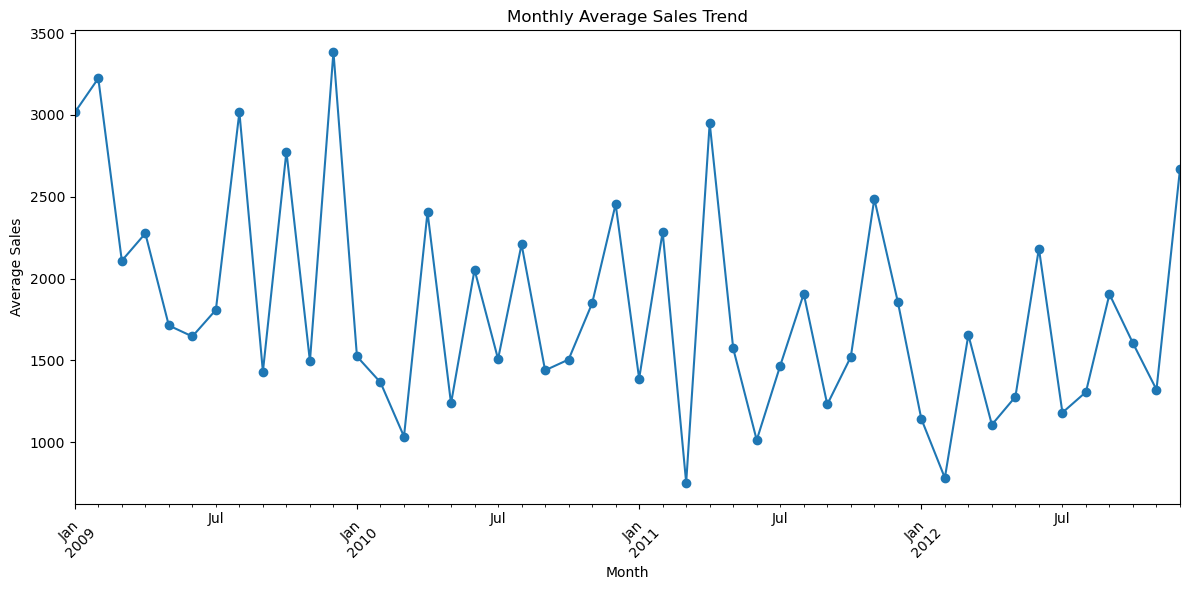


Correlation Matrix:
                   Sales  Discount    Profit  Shipping_Cost  Order_Quantity
Sales           1.000000 -0.002856  0.647503       0.424885        0.234799
Discount       -0.002856  1.000000 -0.059960       0.050953       -0.043920
Profit          0.647503 -0.059960  1.000000      -0.023292        0.190236
Shipping_Cost   0.424885  0.050953 -0.023292       1.000000        0.027607
Order_Quantity  0.234799 -0.043920  0.190236       0.027607        1.000000


In [27]:
identify_trends(df_cleaned)

In [30]:
def basic_ml_classification(df):
    print("\nTask 4: Basic ML Classification Task")
    
    # Define predictors and dependent variable
    predictors = ['Order_Quantity', 'Unit_Price', 'Discount']
    dependent = 'Profitable'  # We'll create this binary variable
    
    # Create a binary 'Profitable' column (1 if Profit > 0, else 0)
    df['Profitable'] = (df['Profit'] > 0).astype(int)
    
    # Split the data into training and testing sets
    train_data, test_data, train_labels, test_labels = train_test_split(
        df[predictors], df[dependent], test_size=0.20, random_state=42)
    
    # Create a Logistic Regression model
    model = LogisticRegression()
    
    # Train the model on the training data
    model.fit(train_data, train_labels)
    
    # Make predictions on the test data
    predictions = model.predict(test_data)
    
    # Evaluate the accuracy of the model
    accuracy = accuracy_score(test_labels, predictions)
    
    # Print the accuracy of the trained model
    print('Accuracy of the trained model: ', accuracy)
    
    # Print the predictions alongside the actual test labels
    print('\nPredictions vs Actual:')
    comparison = pd.DataFrame({'Actual': test_labels, 'Predicted': predictions})
    print(comparison.head(10))
    
    return model

In [33]:
model = basic_ml_classification(df_cleaned)


Task 4: Basic ML Classification Task
Accuracy of the trained model:  0.6026936026936027

Predictions vs Actual:
      Actual  Predicted
123        1          1
432        1          1
1031       1          1
529        0          0
1415       1          0
628        1          1
297        0          0
1473       0          1
67         0          1
49         1          0


In [4]:
# Create a new column 'Profit_Margin' calculated as (Profit / Sales) * 100.

df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100
print(df[['Sales', 'Profit', 'Profit_Margin']].head())

       Sales   Profit  Profit_Margin
0   261.5400  -213.25     -81.536285
1     6.9300    -4.64     -66.955267
2  2808.0800  1054.82      37.563745
3  1761.4000 -1748.56     -99.271034
4   160.2335   -85.13     -53.128715


In [5]:
# Calculate the total sales and average profit for each Customer Segment.

segment_analysis = df.groupby('Customer_Segment').agg({
    'Sales': 'sum',
    'Profit': 'mean'
})
print(segment_analysis)

                        Sales      Profit
Customer_Segment                         
Consumer          503081.9790  171.601136
Corporate         954561.5685  192.292575
Home Office       648162.9230  183.832417
Small Business    526770.5415  234.993173


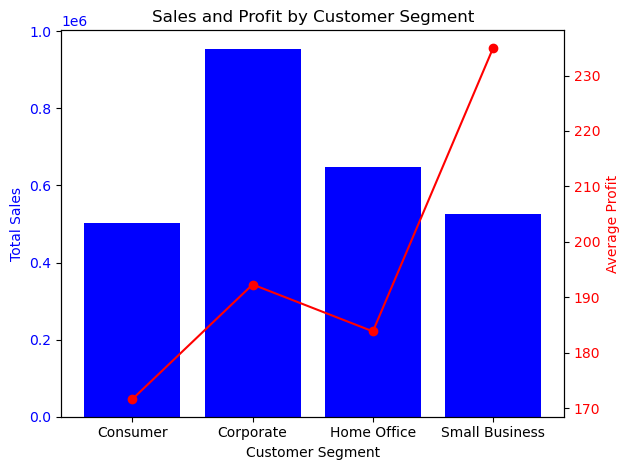

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax1 = plt.subplots()

# Bar chart for 'Sales'
ax1.bar(segment_analysis.index, segment_analysis['Sales'], color='b', label='Sales')
ax1.set_xlabel('Customer Segment')
ax1.set_ylabel('Total Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for 'Profit'
ax2 = ax1.twinx()
ax2.plot(segment_analysis.index, segment_analysis['Profit'], color='r', marker='o', label='Profit')
ax2.set_ylabel('Average Profit', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title
plt.title('Sales and Profit by Customer Segment')

# Show plot
plt.tight_layout()
plt.show()

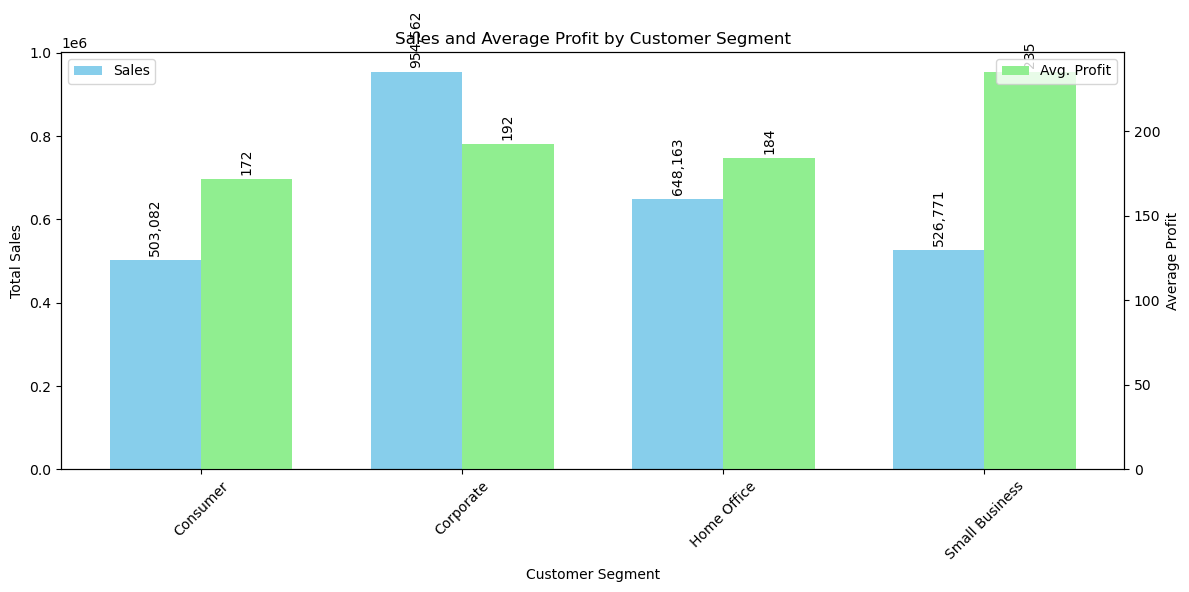

In [7]:
# Extract data from the DataFrame
segments = segment_analysis.index
sales = segment_analysis['Sales']
profits = segment_analysis['Profit']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Set the width of each bar and positions of the bars
width = 0.35
x = np.arange(len(segments))

# Create bars for Sales
bars1 = ax1.bar(x - width/2, sales, width, label='Sales', color='skyblue')

# Create a second y-axis
ax2 = ax1.twinx()

# Create bars for Profit
bars2 = ax2.bar(x + width/2, profits, width, label='Avg. Profit', color='lightgreen')

# Customize the plot
ax1.set_xlabel('Customer Segment')
ax1.set_ylabel('Total Sales')
ax2.set_ylabel('Average Profit')
ax1.set_title('Sales and Average Profit by Customer Segment')
ax1.set_xticks(x)
ax1.set_xticklabels(segments, rotation=45)

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax = bar.axes
        ax.annotate(f'{height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

add_value_labels(bars1)
add_value_labels(bars2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [8]:
# Calculate the correlation between 'Sales' and 'Profit'.

correlation = df['Sales'].corr(df['Profit'])
print(f"Correlation between Sales and Profit: {correlation:.2f}")

Correlation between Sales and Profit: 0.65


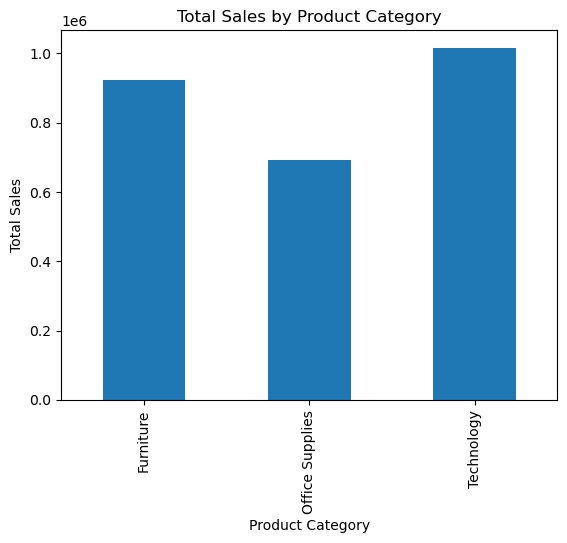

In [9]:
# Create a bar plot showing total sales by Product Category.

import matplotlib.pyplot as plt

sales_by_category = df.groupby('Product_Category')['Sales'].sum()
sales_by_category.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

In [10]:
# Create a new column 'Order_Year' and calculate the year-over-year growth rate in total sales.

# Create Order_Year column
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df['Order_Year'] = df['Order_Date'].dt.year

# Calculate yearly sales
yearly_sales = df.groupby('Order_Year')['Sales'].sum()

# Calculate year-over-year growth rate
yoy_growth = (yearly_sales / yearly_sales.shift(1) - 1) * 100

print("Year-over-year growth rate in total sales:")
print(yoy_growth)

Year-over-year growth rate in total sales:
Order_Year
2009          NaN
2010   -25.472759
2011   -10.172848
2012   -10.133565
Name: Sales, dtype: float64


In [11]:
# Create a new column 'Customer_Value' based on their total purchases. Categorize customers into 'High', 'Medium', and 'Low' value. What percentage of customers fall into each category?

# Calculate total purchases per customer
customer_purchases = df.groupby('Customer_Name')['Sales'].sum()

# Create customer segments
def categorize_value(x):
    if x > customer_purchases.quantile(0.66):
        return 'High'
    elif x > customer_purchases.quantile(0.33):
        return 'Medium'
    else:
        return 'Low'

df['Customer_Value'] = df['Customer_Name'].map(customer_purchases).apply(categorize_value)

# Calculate percentage of customers in each category
value_percentages = df['Customer_Value'].value_counts(normalize=True) * 100

print("Percentage of customers in each category:")
print(value_percentages)

Percentage of customers in each category:
Customer_Value
High      51.079622
Medium    31.578947
Low       17.341430
Name: proportion, dtype: float64


In [12]:
# Calculate the profit margin for each product category and identify the most and least profitable categories.

# Calculate profit margin for each product category
category_profitability = df.groupby('Product_Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
category_profitability['Profit_Margin'] = category_profitability['Profit'] / category_profitability['Sales']

# Identify most and least profitable categories
most_profitable = category_profitability['Profit_Margin'].idxmax()
least_profitable = category_profitability['Profit_Margin'].idxmin()

print("Profit margins by product category:")
print(category_profitability['Profit_Margin'])
print(f"\nMost profitable category: {most_profitable}")
print(f"Least profitable category: {least_profitable}")

Profit margins by product category:
Product_Category
Furniture          0.027125
Office Supplies    0.143293
Technology         0.160279
Name: Profit_Margin, dtype: float64

Most profitable category: Technology
Least profitable category: Furniture


In [13]:
# Calculate the average shipping cost as a percentage of sales for each ship mode. Which shipping mode has the highest percentage?

# Calculate average shipping cost as a percentage of sales for each ship mode
ship_mode_analysis = df.groupby('Ship_Mode').agg({
    'Shipping_Cost': 'mean',
    'Sales': 'mean'
})
ship_mode_analysis['Shipping_Percentage'] = (ship_mode_analysis['Shipping_Cost'] / ship_mode_analysis['Sales']) * 100

# Identify the shipping mode with the highest percentage
highest_percentage_mode = ship_mode_analysis['Shipping_Percentage'].idxmax()

print("Shipping cost as a percentage of sales for each mode:")
print(ship_mode_analysis['Shipping_Percentage'])
print(f"\nShipping mode with the highest percentage: {highest_percentage_mode}")

Shipping cost as a percentage of sales for each mode:
Ship_Mode
Delivery Truck    0.791932
Express Air       0.714293
Regular Air       0.657490
Name: Shipping_Percentage, dtype: float64

Shipping mode with the highest percentage: Delivery Truck


In [37]:
def analyze_shipping_efficiency(df):
    print("\nTask 6: Analyzing Shipping Efficiency")
    df['Shipping_Efficiency'] = df['Shipping_Cost'] / df['Sales']
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Shipping_Days'], df['Shipping_Efficiency'])
    plt.title('Shipping Efficiency vs Shipping Days')
    plt.xlabel('Shipping Days')
    plt.ylabel('Shipping Efficiency (Cost/Sales)')
    plt.tight_layout()
    plt.show()
    
    avg_efficiency_by_mode = df.groupby('Ship_Mode')['Shipping_Efficiency'].mean().sort_values()
    print("\nAverage Shipping Efficiency by Ship Mode:")
    print(avg_efficiency_by_mode)


Task 6: Analyzing Shipping Efficiency


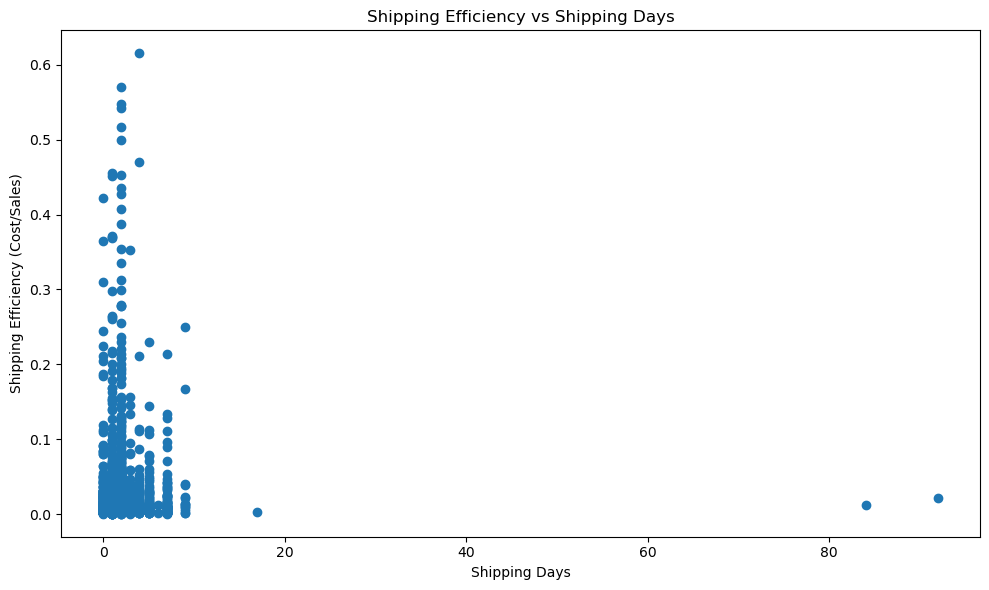


Average Shipping Efficiency by Ship Mode:
Ship_Mode
Delivery Truck    0.025161
Express Air       0.028157
Regular Air       0.036973
Name: Shipping_Efficiency, dtype: float64


In [40]:
analyze_shipping_efficiency(df_cleaned)